In [7]:
from google.colab import drive

# Google Drive'ı bağla
drive.mount('/content/drive')

# Bağlantı başarılı olduktan sonra '/content/drive' yolundan Drive'a erişebilirsiniz.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [4]:
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:
directory='/content/drive/MyDrive/Aygan_derin_ogrenme/Images/'
batch_size = 16
image_size = (128, 128)

In [6]:
import keras
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [7]:
train=tf.keras.utils.image_dataset_from_directory(directory,image_size=image_size,
                                                validation_split=0.2,
                                                subset='training',seed=123,batch_size = 16)

val=tf.keras.utils.image_dataset_from_directory(directory,image_size=image_size,
                                                validation_split=0.2,
                                                subset='validation',seed=123,batch_size = 16)

Found 20580 files belonging to 120 classes.
Using 8232 files for training.
Found 20580 files belonging to 120 classes.
Using 205 files for validation.


In [8]:
label_to_class_name = dict(zip(range(len(train.class_names)), val.class_names))
label_to_class_name

{0: 'n02085620-Chihuahua',
 1: 'n02085782-Japanese_spaniel',
 2: 'n02085936-Maltese_dog',
 3: 'n02086079-Pekinese',
 4: 'n02086240-Shih-Tzu',
 5: 'n02086646-Blenheim_spaniel',
 6: 'n02086910-papillon',
 7: 'n02087046-toy_terrier',
 8: 'n02087394-Rhodesian_ridgeback',
 9: 'n02088094-Afghan_hound',
 10: 'n02088238-basset',
 11: 'n02088364-beagle',
 12: 'n02088466-bloodhound',
 13: 'n02088632-bluetick',
 14: 'n02089078-black-and-tan_coonhound',
 15: 'n02089867-Walker_hound',
 16: 'n02089973-English_foxhound',
 17: 'n02090379-redbone',
 18: 'n02090622-borzoi',
 19: 'n02090721-Irish_wolfhound',
 20: 'n02091032-Italian_greyhound',
 21: 'n02091134-whippet',
 22: 'n02091244-Ibizan_hound',
 23: 'n02091467-Norwegian_elkhound',
 24: 'n02091635-otterhound',
 25: 'n02091831-Saluki',
 26: 'n02092002-Scottish_deerhound',
 27: 'n02092339-Weimaraner',
 28: 'n02093256-Staffordshire_bullterrier',
 29: 'n02093428-American_Staffordshire_terrier',
 30: 'n02093647-Bedlington_terrier',
 31: 'n02093754-Border_

[[[ 77  69  82]
  [ 75  67  80]
  [ 67  59  72]
  ...
  [ 90  81 106]
  [130 108 125]
  [133 104 114]]

 [[ 81  73  86]
  [ 86  78  91]
  [ 67  60  72]
  ...
  [ 91  82 107]
  [134 112 129]
  [132 105 115]]

 [[107  96 110]
  [101  92 106]
  [ 71  63  76]
  ...
  [ 84  76 102]
  [128 108 125]
  [137 111 121]]

 ...

 [[ 80  96 132]
  [ 78  94 130]
  [ 84 100 134]
  ...
  [ 75  81 106]
  [ 75  81 106]
  [ 77  81 107]]

 [[ 89 105 140]
  [ 76  92 126]
  [ 87 103 136]
  ...
  [ 80  88 117]
  [ 78  86 115]
  [ 72  82 110]]

 [[105 121 156]
  [ 79  95 129]
  [ 79  95 128]
  ...
  [ 81  90 119]
  [ 76  85 114]
  [ 68  78 107]]]
[[[189 197 208]
  [187 195 206]
  [159 165 172]
  ...
  [ 54  81  76]
  [ 59  86  81]
  [ 61  88  83]]

 [[136 141 154]
  [173 178 187]
  [136 137 141]
  ...
  [ 64  89  85]
  [ 57  82  78]
  [ 54  79  75]]

 [[135 138 144]
  [156 157 160]
  [157 156 154]
  ...
  [ 68  90  87]
  [ 67  89  86]
  [ 65  88  85]]

 ...

 [[174 175 143]
  [ 75  74  50]
  [190 185 169]
  ..

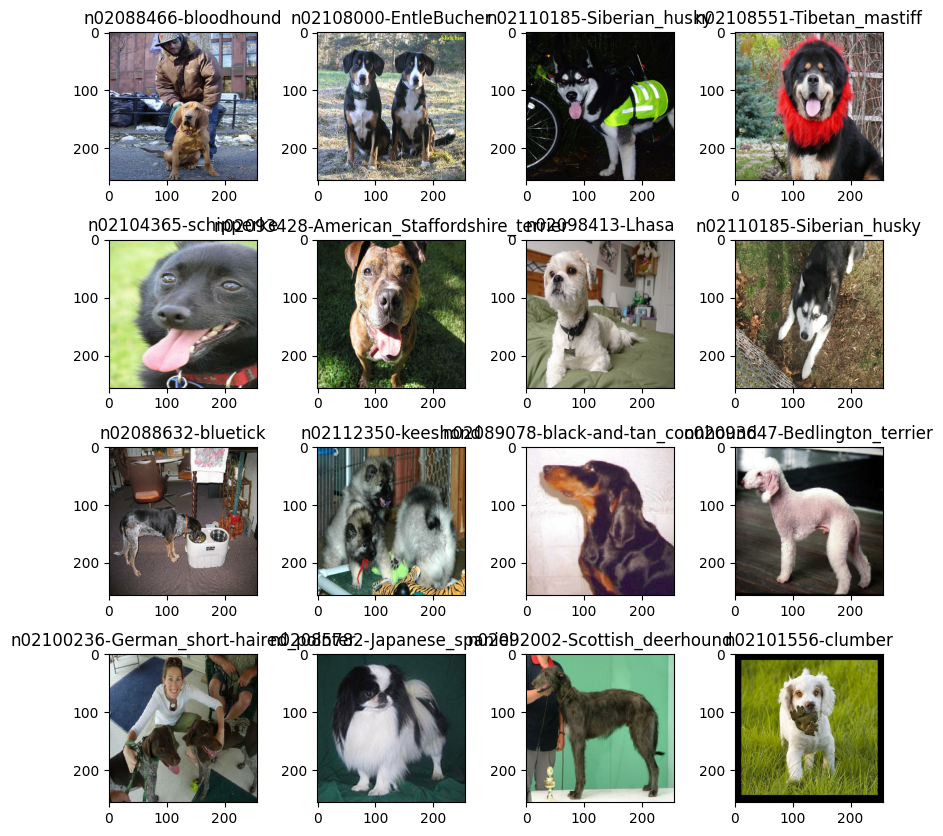

In [9]:
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i in range(4):
    for j in range(4):
        index = i * 4 + j
        ax[i, j].imshow(batch[0][index].astype(int))
        print(batch[0][index].astype(int))
        ax[i, j].set_title(label_to_class_name[batch[1][index]])
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [10]:
train=train.map(lambda x,y:(x/255,y))
val=val.map(lambda x,y:(x/255,y))

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)

In [19]:
VGG_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(256,256,3),
                   pooling='max',classes=120,
                   weights='imagenet')


VGG_model.add(pretrained_model)
VGG_model.add(Flatten())
VGG_model.add(Dense(512, activation='relu'))
VGG_model.add(BatchNormalization())  # Batch Normalization layer
VGG_model.add(Dropout(0.5))

VGG_model.add(Dense(120, activation='softmax'))
pretrained_model.trainable=False

In [20]:
VGG_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
VGG_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 120)               61560     
                                                        

In [22]:
epochs=25
history = VGG_model.fit(
  train,
  validation_data=val,
  epochs=epochs
)


Epoch 1/15
515/515 [==============================] - 98s 165ms/step - loss: 4.2907 - accuracy: 0.0832 - val_loss: 3.6535 - val_accuracy: 0.1610
Epoch 2/15
515/515 [==============================] - 44s 85ms/step - loss: 3.1871 - accuracy: 0.2318 - val_loss: 3.1727 - val_accuracy: 0.2390
Epoch 3/15
515/515 [==============================] - 43s 84ms/step - loss: 2.8439 - accuracy: 0.2948 - val_loss: 3.1231 - val_accuracy: 0.2780
Epoch 4/15
515/515 [==============================] - 43s 84ms/step - loss: 2.6470 - accuracy: 0.3361 - val_loss: 3.0125 - val_accuracy: 0.2878
Epoch 5/15
515/515 [==============================] - 43s 84ms/step - loss: 2.5360 - accuracy: 0.3581 - val_loss: 2.9424 - val_accuracy: 0.2927
Epoch 6/15
515/515 [==============================] - 44s 85ms/step - loss: 2.4632 - accuracy: 0.3633 - val_loss: 3.0432 - val_accuracy: 0.3073
Epoch 7/15
515/515 [==============================] - 44s 85ms/step - loss: 2.3609 - accuracy: 0.3867 - val_loss: 2.9733 - val_accuracy

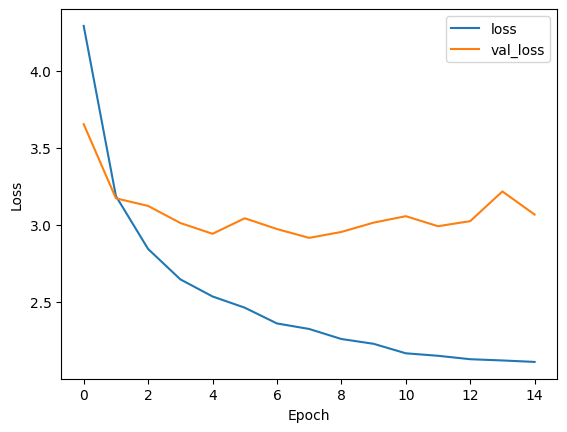

In [29]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

plt.show()

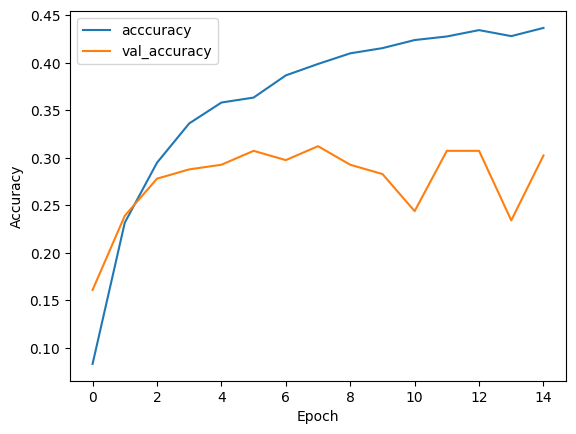

In [31]:
plt.plot(history.history["accuracy"], label="acccuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()

plt.show()